In [5]:
import pandas as pd
import seaborn as sns
import skillsnetwork
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [6]:
df = pd.read_csv("../data/Ames_Housing_Data.tsv", sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
df = df.loc[df['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy()

Number of rows in the data: 2925
Number of columns in the data: 82


In [8]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
one_hot_encode_cols = df.dtypes[df.dtypes == object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()

df[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


In [7]:
# one hot encoding
df = pd.get_dummies(df, columns= one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2925.0,1.464795e+03,8.464417e+02,1.0,7.320000e+02,1463.0,2.199000e+03,2.930000e+03
PID,2925.0,7.143931e+08,1.887274e+08,526301100.0,5.284770e+08,535453210.0,9.071801e+08,1.007100e+09
MS SubClass,2925.0,5.739658e+01,4.266875e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2435.0,6.902382e+01,2.271092e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2925.0,1.010358e+04,7.781999e+03,1300.0,7.438000e+03,9428.0,1.151500e+04,2.152450e+05
Overall Qual,2925.0,6.088205e+00,1.402953e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2925.0,5.563761e+00,1.112262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2925.0,1.971303e+03,3.024247e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2925.0,1.984234e+03,2.086177e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2902.0,1.007105e+02,1.760343e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [10]:
mask = data.dtypes == float
float_cols = data.columns[mask]

skew_limit = 0.75
skew_vals = data[float_cols].skew()

In [11]:
skew_cols = (skew_vals
             .sort_values(ascending=True)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit))
             )
skew_cols

,Skew
BsmtFin SF 1,0.821985
Bsmt Unf SF,0.925021
Lot Frontage,1.111071
Mas Vnr Area,2.565458
Bsmt Half Bath,3.965970
BsmtFin SF 2,4.135900


NameError: name 'df' is not defined

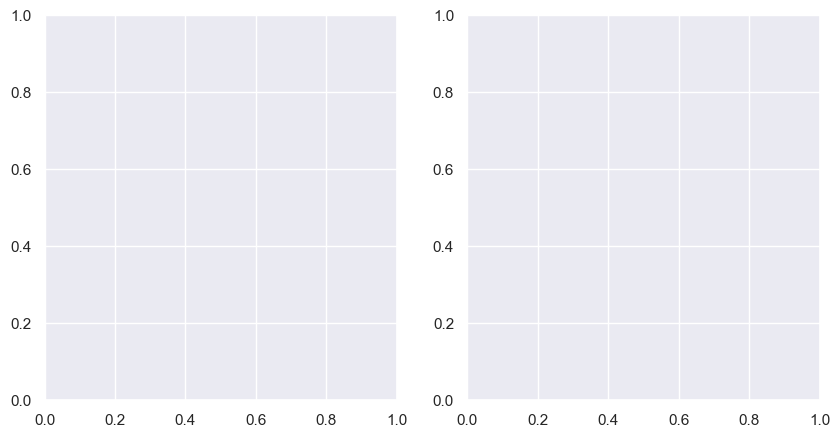

In [4]:
field = "BsmtFin SF 1"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df[field].hist(ax=ax_before)
df[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field))

In [13]:
for col in skew_cols.index.values:
    if col == "SalesPrice":
        continue
    df[col] = df[col].apply(np.log1p)

NameError: name 'np' is not defined